In [96]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt

import numpy as np
import random

from mxnet import nd
from mxnet import autograd
from mxnet import gluon
from mxnet import init

w_true:  
[[-0.31140256]
 [-0.86044616]]
<NDArray 2x1 @cpu(0)>
b_true 
[0.5948809]
<NDArray 1 @cpu(0)>
(1000, 2)
(1000, 1)


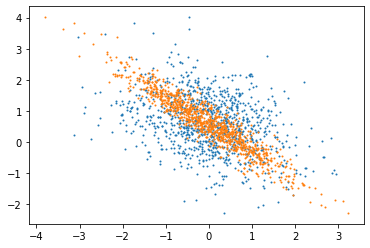

In [107]:
# create data
num_of_features = 2
num_of_examples = 1000

w_true = nd.random.normal(0, 2, (num_of_features, 1))
b_true = nd.random.normal()
print('w_true: ', w_true)
print('b_true', b_true)

X_feats = nd.random.normal(0, 1, [num_of_examples, num_of_features])
y_true = nd.dot(X_feats, w_true) + b_true + nd.random.normal(0, 0.01, [num_of_examples, 1])
print(X_feats.shape)
print(y_true.shape)

plt.scatter(X_feats[:, 0].asnumpy(), y_true.asnumpy(), 1);
plt.scatter(X_feats[:, 1].asnumpy(), y_true.asnumpy(), 1);
plt.show()

In [108]:
# Build Linear Regression using only NDArray & autograd
def data_iter(batch_size, X_feats, y_true):
    N = len(X_feats)
    indices = list(range(N))
    random.shuffle(indices)
    for i in range(0, N, batch_size):
        j = nd.array(indices[i: i + batch_size])
        yield X_feats.take(j), y_true.take(j)
    return 

def linreg(X, w, b):
    return nd.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size
    return 

lr = 0.03
num_of_epochs = 10
batch_size = 10

# initialize params
w = nd.random.normal(0, 0.01, [num_of_features, 1])
b = nd.zeros(shape=(1,))
w.attach_grad()
b.attach_grad()

for ep in range(num_of_epochs):
    for X, y in data_iter(batch_size, X_feats, y_true):
        with autograd.record():
            l = squared_loss(linreg(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = squared_loss(linreg(X_feats, w, b), y_true)
    print('epoch %d, loss %f' % (ep + 1, train_l.mean().asnumpy()))
    
print(w_true, w)
print(w_true.norm(1) - w.norm(1))
print("#" * 30)
print(b_true, b)
print(b_true.norm(1) - b.norm(1))

epoch 1, loss 0.001317
epoch 2, loss 0.000049
epoch 3, loss 0.000047
epoch 4, loss 0.000047
epoch 5, loss 0.000047
epoch 6, loss 0.000047
epoch 7, loss 0.000047
epoch 8, loss 0.000047
epoch 9, loss 0.000047
epoch 10, loss 0.000047

[[-0.31140256]
 [-0.86044616]]
<NDArray 2x1 @cpu(0)> 
[[-0.3118826]
 [-0.8615732]]
<NDArray 2x1 @cpu(0)>

[-0.00160706]
<NDArray 1 @cpu(0)>
##############################

[0.5948809]
<NDArray 1 @cpu(0)> 
[0.59493476]
<NDArray 1 @cpu(0)>

[-5.38826e-05]
<NDArray 1 @cpu(0)>


In [109]:
# Build Linear Regression using gluon

batch_size = 10
dataset = gluon.data.ArrayDataset(X_feats, y_true)
data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)

net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))

net.initialize(init.Normal(sigma=0.01))

loss = gluon.loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

num_of_epochs = 10
for epoch in range(1, num_of_epochs+1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(X_feats), y_true)
    print('epoch %d, loss %f' % (epoch, l.mean().asnumpy()))

dense = net[0]
print(w_true, dense.weight.data())
print(w_true.norm(1) - dense.weight.data().norm(1))
print("#" * 30)
print(b_true, dense.bias.data())
print(b_true.norm(1) - dense.bias.data().norm(1))

epoch 1, loss 0.001285
epoch 2, loss 0.000049
epoch 3, loss 0.000047
epoch 4, loss 0.000047
epoch 5, loss 0.000047
epoch 6, loss 0.000047
epoch 7, loss 0.000047
epoch 8, loss 0.000047
epoch 9, loss 0.000047
epoch 10, loss 0.000047

[[-0.31140256]
 [-0.86044616]]
<NDArray 2x1 @cpu(0)> 
[[-0.3115403 -0.8604601]]
<NDArray 1x2 @cpu(0)>

[-0.00015163]
<NDArray 1 @cpu(0)>
##############################

[0.5948809]
<NDArray 1 @cpu(0)> 
[0.59552234]
<NDArray 1 @cpu(0)>

[-0.00064147]
<NDArray 1 @cpu(0)>
